# Interpolazione delle curve di Gumbel con il metodo dei momenti

Ricordiamo l'espressione della famiglia parametrica di curve di Gumbel:
$$ P[H<h; a,b] = e^{-e-{\frac{h-a}{b}}}$$
È noto inoltre che il valore atteso di $H$, è:
$$ E[H;a,b] = b \gamma + a $$
dove $\gamma = 0.572$ è il numero irrazionale detto di Eulero-Mascheroni.
Il valore della varianza è invece:
$$ Var[H;a,b] = b^2 \frac{\pi^2}{6}$$
Il metodo dei momenti consiste nell'uguagliare media e varianza del campione con media e varianza della popolazione.

## Operazioni preliminari

In [1]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt

os.getcwd()
os.chdir("/Users/riccardo/Dropbox/A-Data/Paperopoli")
data = pd.read_csv('PluviometriaPaperopoli_4.txt')
map(datetime,data['anno'])
data=data.set_index('anno')

In [2]:
data

,1h,3h,6h,12h,24h
anno,,,,,
1925,50.0,NaN,NaN,NaN,NaN
1928,35.0,47.0,50.0,50.4,67.6
1929,35.4,36.4,36.4,49.6,74.0
1930,67.2,68.2,80.8,102.2,106.8
1931,25.2,NaN,NaN,NaN,NaN
1932,35.2,NaN,NaN,NaN,NaN
1934,48.6,NaN,NaN,NaN,NaN
1935,36.4,55.2,81.0,94.4,149.0
1936,47.8,54.2,55.4,55.6,74.6


In [5]:
?data

In [6]:
dir(data)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__

In [1]:
means=data.mean()
means

NameError: name 'data' is not defined

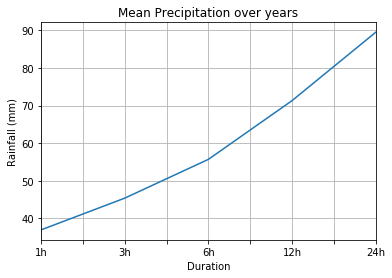

In [11]:
ax=means.plot()
ax.grid(True)
#ax.legend(loc='right')
ax.set_title('Mean Precipitation over years')
ax.set_xlabel('Duration')
ax.set_ylabel('Rainfall (mm)')

In [12]:
variances=data.var()
variances

1h     158.739853
3h     188.130182
6h     289.751919
12h    551.671434
24h    946.383919
dtype: float64

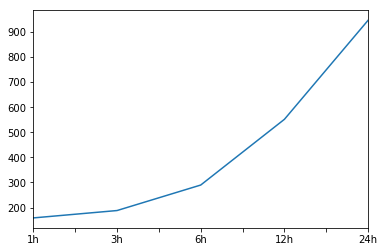

In [13]:
variances.plot()

In [14]:
stds=data.std()
stds

1h     12.599200
3h     13.716056
6h     17.022101
12h    23.487687
24h    30.763354
dtype: float64

In [15]:
cv=data.std()/means
cv

1h     0.341331
3h     0.302382
6h     0.305664
12h    0.329308
24h    0.343614
dtype: float64

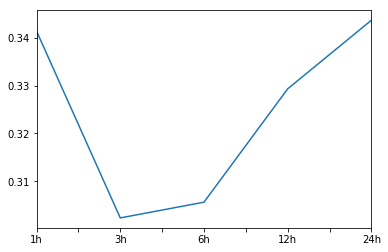

In [16]:
cv.plot()

Il metodo dei momenti si riduce alla risoluzione di:
\begin{equation}
\left\{
\begin{array}{l}
b \gamma + a = \mu_H \\
\sigma^2_H = b^2  \frac{\pi^2}{6}
\end{array}
\right.
\end{equation}
dove $a$ e $b$ sono i parametri da stimare $mu_H$ è la media del campioni di dati e $\sigma_H$ è la deviazione standard dei medesimi dati. 
Dalla seconda equazione si ricava:
\begin{equation}
b = \frac{\sqrt{6}}{\pi} \sigma_H
\end{equation}
che, sostituito nella prima equazione, dà:
\begin{equation}
a = \mu_H -\frac{\sqrt{6}\gamma}{\pi} \sigma_H 
\end{equation}

In [17]:
math.sqrt(6)/math.pi

0.779696801233676

In [18]:
EulerGamma=0.577215664901532860606512090
0.779696801233676*EulerGamma

0.4500532075456946

In [19]:
def g(m,s):
    return pd.DataFrame([m-0.4500532075456946*s,0.779696801233676*s],index=["a","b"])

In [20]:
abs_m=g(means,stds)
abs_m

,1h,3h,6h,12h,24h
a,31.241689,39.187045,48.028038,60.753736,75.683743
b,9.823556,10.694365,13.272078,18.313274,23.986088


Adesso si tratta di disegnare le curve di Gumbel con i diversi parametri (matplotlib è già caricato). 

http://stackoverflow.com/questions/17098654/how-to-store-data-frame-using-pandas-python

In [21]:
abs_m.to_pickle("abs_m")

In [30]:
from scipy.stats import genextreme,gumbel_r
from numpy import linspace

In [33]:
def gumbel(x,abs_d,col):
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))

In [46]:
from statsmodels.distributions.empirical_distribution import ECDF

In [47]:
ecdf1h = ECDF(data["1h"])

Questa azione merita un minimo di progettazione. Vogliamo disegnare un grafico in cui si sovrappongono dati e curve interpolate. Per fare questo vogliamo costruire un DataFrame che contiene tutte le curve interpolate. Al quale poi aggiungiamo, una ad una i punti interpolati

In [89]:
data.min()[0]

19.600000000000001

In [90]:
data.max()[4]

169.40000000000001

In [100]:
t_rain=np.linspace(data.min()[0],data.max()[4],100)

In [116]:
gb=pd.DataFrame([gumbel(t_rain,abs_m,"1h"),
                 gumbel(t_rain,abs_m,"3h"),
                 gumbel(t_rain,abs_m,"6h"),
                 gumbel(t_rain,abs_m,"12h"),
                 gumbel(t_rain,abs_m,"24h")]).T
gb.index=t_rain
gb.columns=["1h","3h","6h","12h","24"]
gb

,1h,3h,6h,12h,24
19.600000,0.037971,0.001943,0.000200,0.000078,0.000032
21.113131,0.060567,0.004428,0.000501,0.000165,0.000060
22.626263,0.090381,0.009053,0.001137,0.000329,0.000108
24.139394,0.127380,0.016841,0.002360,0.000621,0.000189
25.652525,0.170944,0.028865,0.004529,0.001115,0.000319
27.165657,0.219972,0.046079,0.008101,0.001912,0.000521
28.678788,0.273053,0.069156,0.013611,0.003142,0.000828
30.191919,0.328644,0.098378,0.021625,0.004962,0.001277
31.705051,0.385225,0.133589,0.032686,0.007558,0.001919
33.218182,0.441424,0.174226,0.047254,0.011134,0.002813


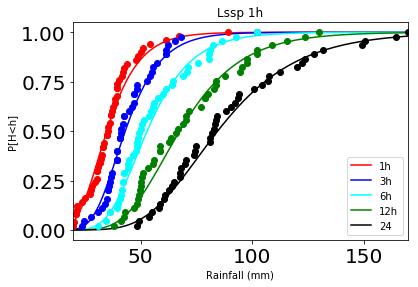

In [119]:
plt.rc('xtick', labelsize=20) #Quest  comandi globali
plt.rc('ytick', labelsize=20) #Questi sono comandi globali
ax=gb.plot(color=["red","blue","cyan","green","black"])
ecdf1h = ECDF(data["1h"])
ax.plot(data["1h"],ecdf1h(data["1h"]),'o',c="red",label="1h")
data3h=data["3h"].dropna()
ecdf3h = ECDF(data3h)
ax.plot(data3h,ecdf3h(data3h),"o",c="blue",label="3h")
data6h=data["6h"].dropna()
ecdf6h = ECDF(data6h)
ax.plot(data6h,ecdf6h(data6h),"o",c="cyan")
data12h=data["12h"].dropna()
ecdf12h = ECDF(data12h)
ax.plot(data12h,ecdf12h(data12h),"o",c="green")
data24h=data["24h"].dropna()
ecdf24h = ECDF(data24h)
ax.plot(data24h,ecdf24h(data24h),"o",c="black")
ax.set_title('Lssp 1h')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('P[H<h]')